## TOV Equations

In [29]:
import matplotlib.pyplot as plt
import numpy as np

import kuibit.cactus_scalars as cs
import kuibit.simdir as sd

from kuibit import grid_data as gd


# Change ONLY the resolution 

In [139]:
sim_1 = sd.SimDir("./TOV_example_dx_1/")
sim_2 = sd.SimDir("./TOV_example_dx_1p5/")
sim_3 = sd.SimDir("./TOV_example_dx_2/")
sim_4 = sd.SimDir("./TOV_example_dx_2p4/")

timeseries_1 = sim_1.timeseries
timeseries_2 = sim_2.timeseries
timeseries_3 = sim_3.timeseries
timeseries_4 = sim_4.timeseries


### Maximum of $\rho$ over time

In [140]:
rho_max_1 = timeseries_1.maximum.fields.rho
rho_max_2 = timeseries_2.maximum.fields.rho
rho_max_3 = timeseries_3.maximum.fields.rho
rho_max_4 = timeseries_4.maximum.fields.rho

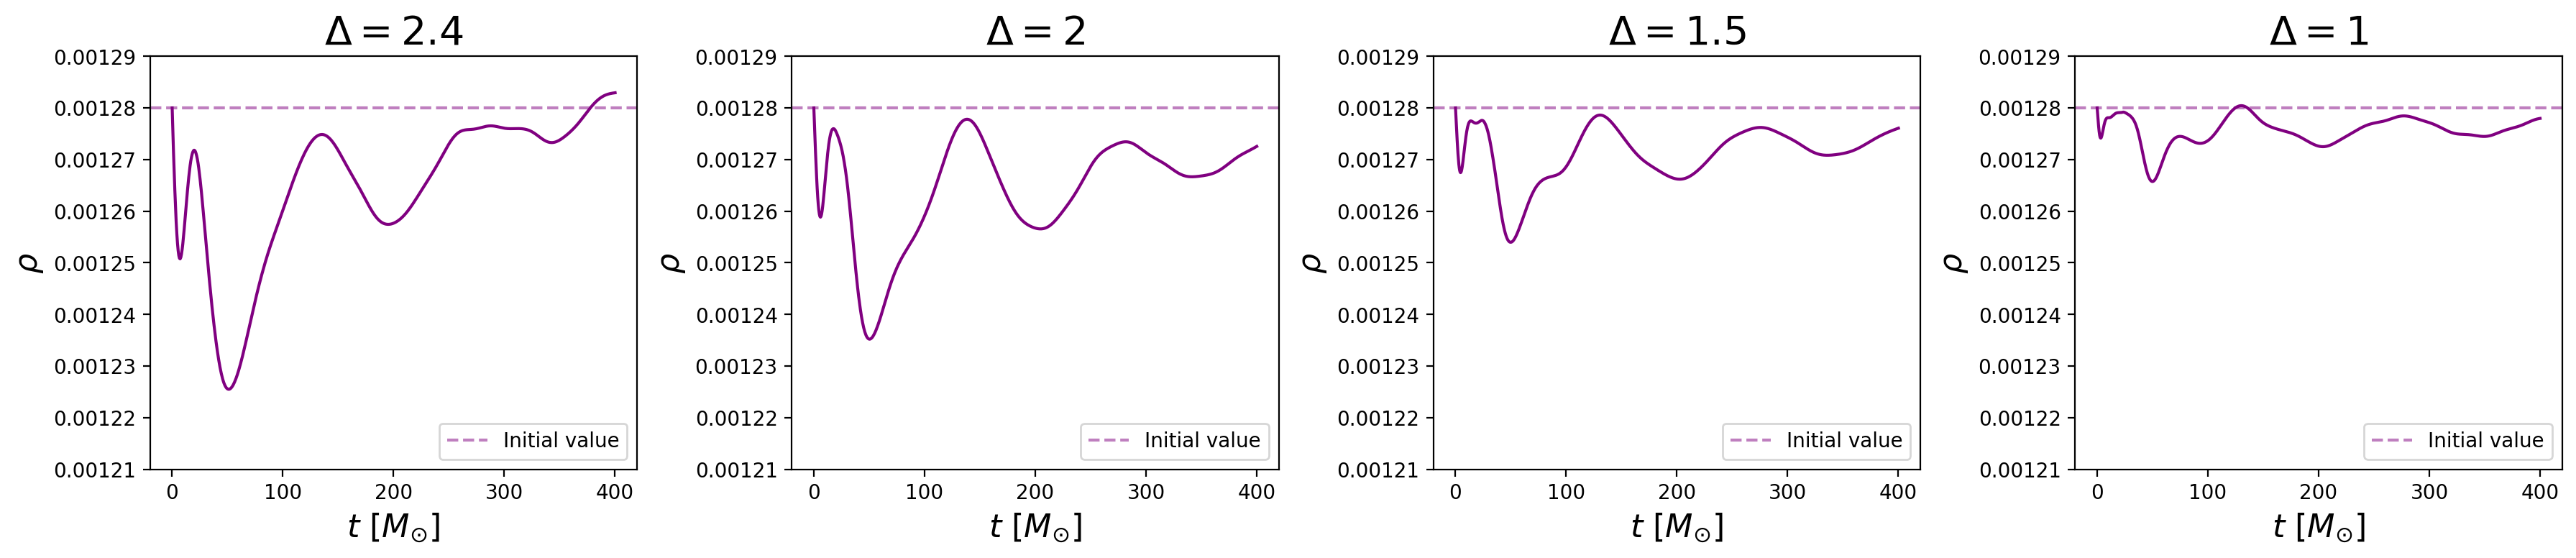

In [146]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))

ax1.plot(rho_max_4, c='purple')
ax1.axhline(rho_max_4.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#ax1.set_title("maximum rest-mass density")
ax1.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax1.set_ylabel(r'$\rho$', fontsize=16)
ax1.set_title(r'$\Delta = 2.4$', fontsize=20)
ax1.legend(loc='lower right')
ax1.set_ylim(0.00121, 0.00129)

ax2.plot(rho_max_3, c='purple')
ax2.axhline(rho_max_3.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#a2.set_title("maximum rest-mass density")
ax2.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax2.set_ylabel(r'$\rho$', fontsize=16)
ax2.set_title(r'$\Delta = 2$', fontsize=20)
ax2.legend(loc='lower right')
ax2.set_ylim(0.00121, 0.00129)

ax3.plot(rho_max_2, c='purple')
ax3.axhline(rho_max_2.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#a3.set_title("maximum rest-mass density")
ax3.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax3.set_ylabel(r'$\rho$', fontsize=16)
ax3.set_title(r'$\Delta = 1.5$', fontsize=20)
ax3.legend(loc='lower right')
ax3.set_ylim(0.00121, 0.00129)


ax4.plot(rho_max_1, c='purple')
ax4.axhline(rho_max_1.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#a3.set_title("maximum rest-mass density")
ax4.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax4.set_ylabel(r'$\rho$', fontsize=16)
ax4.set_title(r'$\Delta = 1$', fontsize=20)
ax4.legend(loc='lower right')
ax4.set_ylim(0.00121, 0.00129)


plt.tight_layout()
plt.savefig("./images/rho_diff_res.png")
plt.show()

no perturbation in the pressure but I can see a lot of oscillations
the surface of the star should be a perfect sphere and in our case it's not bc we are trying tu put a sphere on a cartesian grid. so teh oscillations are just a matter of resolution and the prove is the fact that as we increase the resolution we go closer and closer to a constant.

Change the resolution is a way to understand if a phenomenon is numerical or physical

### Grid 

In [141]:
gf_1 = sim_1.gf
gf_2 = sim_2.gf
gf_3 = sim_3.gf
gf_4 = sim_4.gf

vars2D_1 = gf_1.xy
vars2D_2 = gf_2.xy
vars2D_3 = gf_3.xy
vars2D_4 = gf_4.xy

In [142]:
rho_1 = vars2D_1.fields.rho
rho_2 = vars2D_2.fields.rho
rho_3 = vars2D_3.fields.rho
rho_4 = vars2D_4.fields.rho

small_grid = gd.UniformGrid([100, 100], x0=[0, 0], x1=[18,18])

rho_small_1 = rho_1.read_on_grid(409600, small_grid)
rho_small_2 = rho_2.read_on_grid(409600, small_grid)
rho_small_3 = rho_3.read_on_grid(409600, small_grid)
rho_small_4 = rho_4.read_on_grid(339968, small_grid)


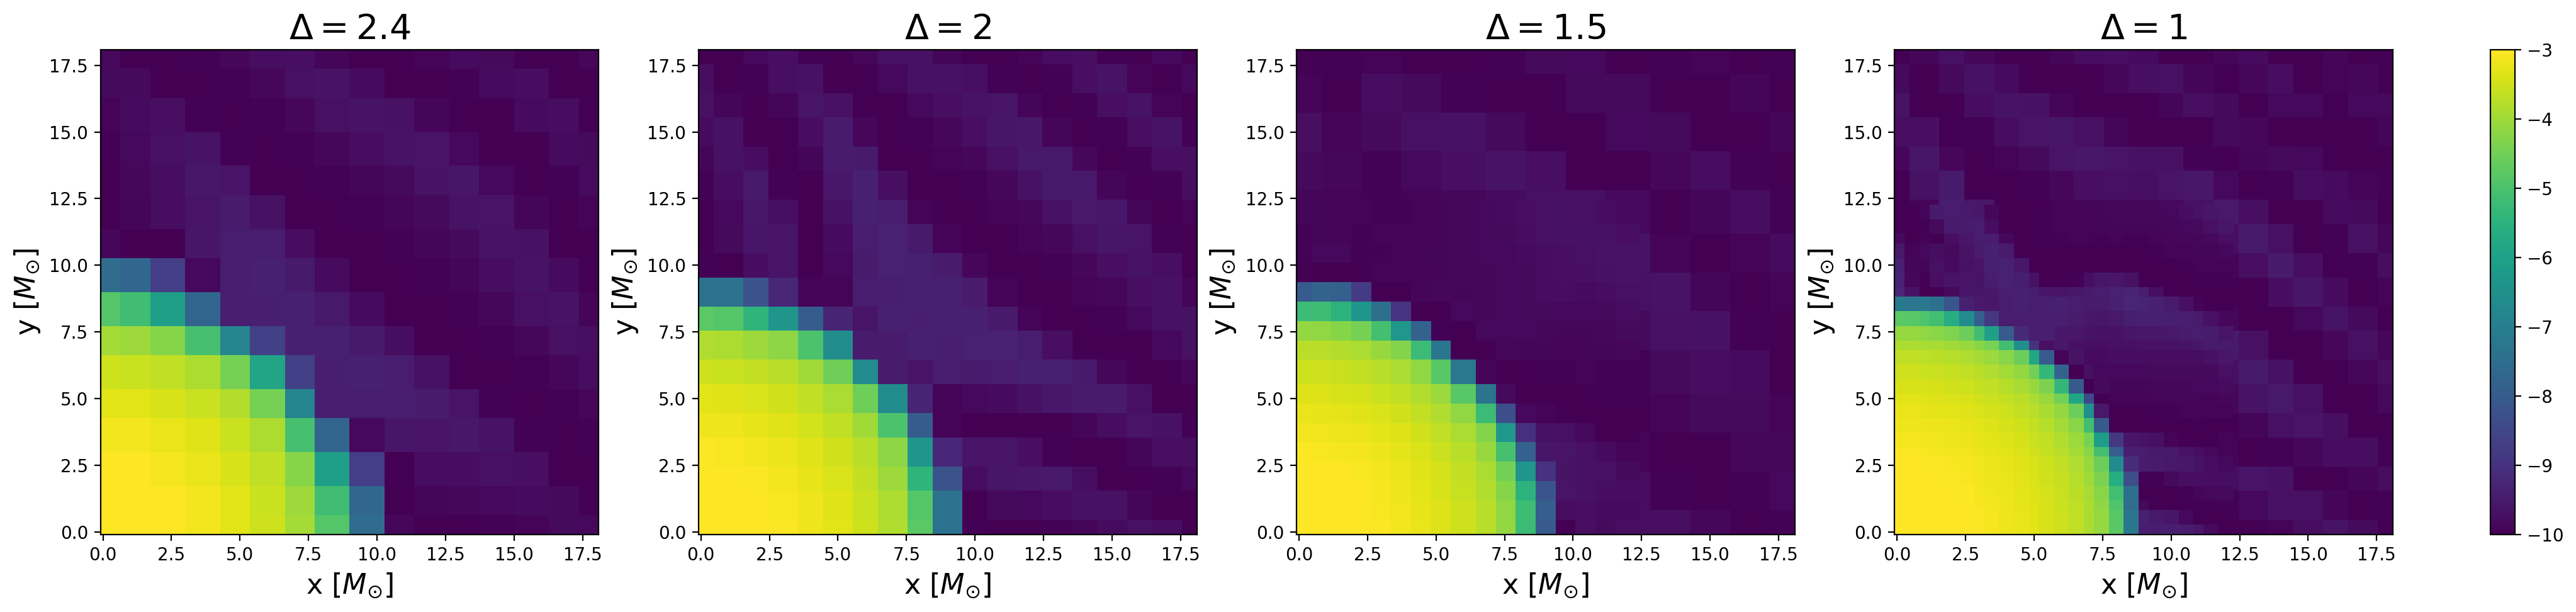

In [144]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))  # 1 riga, 4 colonne

rho_list = [rho_small_4, rho_small_3, rho_small_2, rho_small_1]  # Le tue 4 densità
titles = ["$\Delta = 2.4$", "$\Delta = 2$", "$\Delta = 1.5$", "$\Delta = 1$"]  # Titoli per ogni subplot

for i, ax in enumerate(axes):
    cf = ax.pcolormesh(*rho_list[i].coordinates_meshgrid(), np.log10(rho_list[i].data_xyz), vmin=-10, vmax=-3)
    ax.set_title(titles[i], fontsize=20)  # Imposta il titolo del subplot
    ax.set_xlabel("x [$M_{\odot}$]", fontsize=16)
    ax.set_ylabel("y [$M_{\odot}$]", fontsize=16)

fig.colorbar(cf, ax=axes, orientation="vertical", fraction=0.02, pad=0.04)  # Barra colore condivisa
plt.savefig('./images/grid_diff_res.png')
plt.show()

# Introduce pressure perturbation - poly_k=95 and change resolution

In [147]:
sim_1 = sd.SimDir("./TOV_example_dx_1_k95/")
sim_2 = sd.SimDir("./TOV_example_dx_1p5_k95/")
sim_3 = sd.SimDir("./TOV_example_dx_2_k95/")
sim_4 = sd.SimDir("./TOV_example_dx_2p4_k95/")

timeseries_1 = sim_1.timeseries
timeseries_2 = sim_2.timeseries
timeseries_3 = sim_3.timeseries
timeseries_4 = sim_4.timeseries


### Maximum of $\rho$ over time

In [148]:
rho_max_1 = timeseries_1.maximum.fields.rho
rho_max_2 = timeseries_2.maximum.fields.rho
rho_max_3 = timeseries_3.maximum.fields.rho
rho_max_4 = timeseries_4.maximum.fields.rho

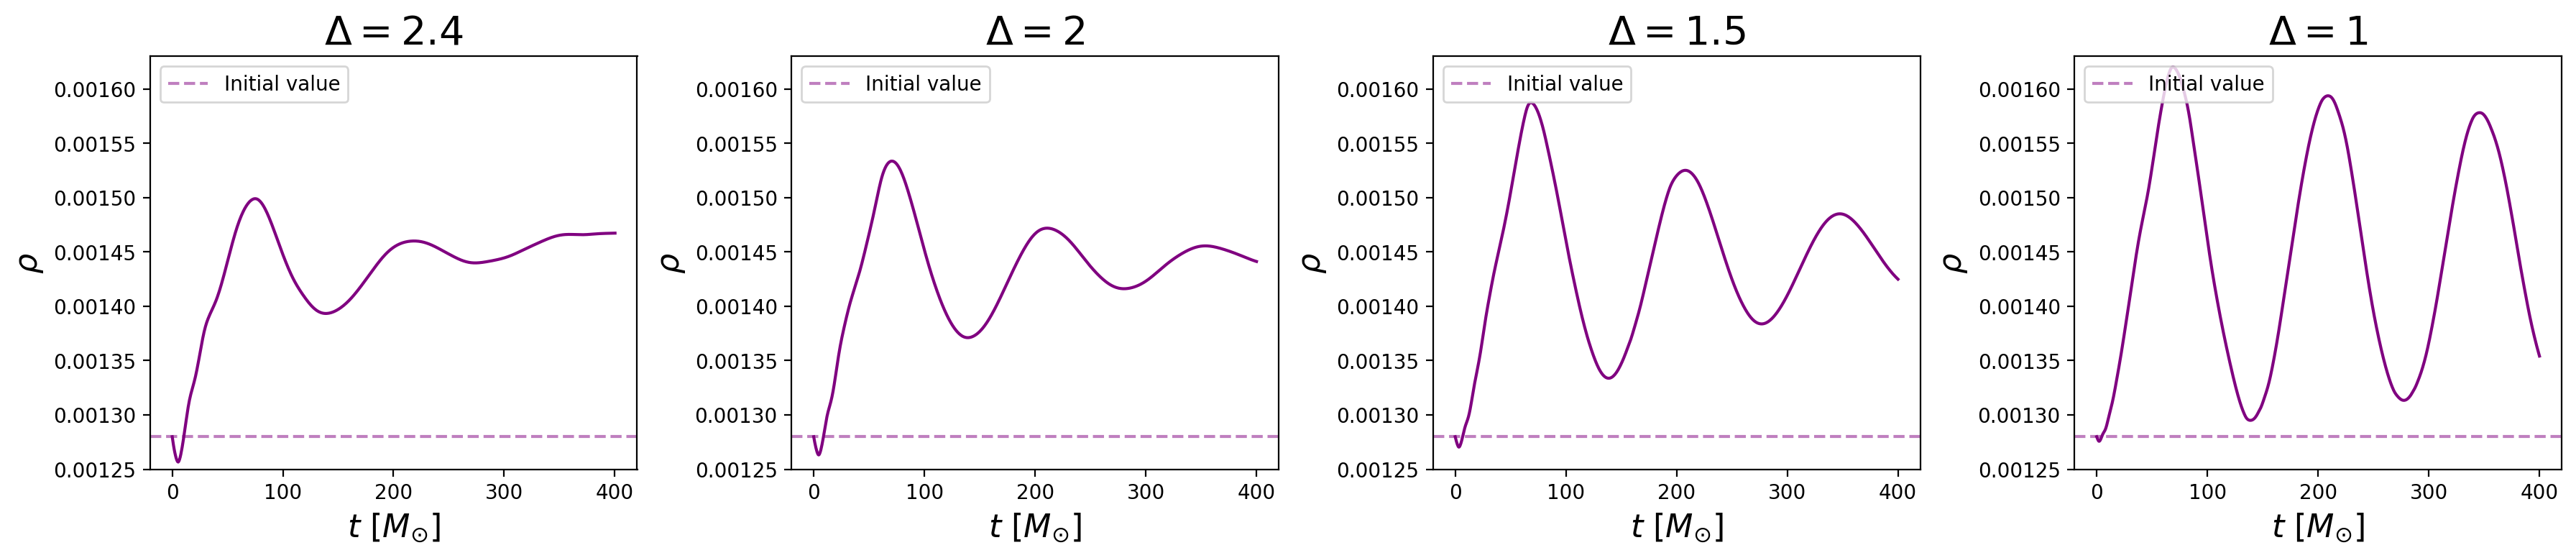

In [149]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 4))

ax1.plot(rho_max_4, c='purple')
ax1.axhline(rho_max_4.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#ax1.set_title("maximum rest-mass density")
ax1.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax1.set_ylabel(r'$\rho$', fontsize=16)
ax1.set_title(r'$\Delta = 2.4$', fontsize=20)
ax1.legend(loc='upper left')
ax1.set_ylim(0.00125, 0.00163)

ax2.plot(rho_max_3, c='purple')
ax2.axhline(rho_max_3.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#a2.set_title("maximum rest-mass density")
ax2.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax2.set_ylabel(r'$\rho$', fontsize=16)
ax2.set_title(r'$\Delta = 2$', fontsize=20)
ax2.legend(loc='upper left')
ax2.set_ylim(0.00125, 0.00163)

ax3.plot(rho_max_2, c='purple')
ax3.axhline(rho_max_2.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#a3.set_title("maximum rest-mass density")
ax3.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax3.set_ylabel(r'$\rho$', fontsize=16)
ax3.set_title(r'$\Delta = 1.5$', fontsize=20)
ax3.legend(loc='upper left')
ax3.set_ylim(0.00125, 0.00163)


ax4.plot(rho_max_1, c='purple')
ax4.axhline(rho_max_1.y[0] ,c='purple', linestyle='dashed', alpha=0.5, label='Initial value')
#a3.set_title("maximum rest-mass density")
ax4.set_xlabel(r'$t$ [$M_{\odot}$]', fontsize=16)
ax4.set_ylabel(r'$\rho$', fontsize=16)
ax4.set_title(r'$\Delta = 1$', fontsize=20)
ax4.legend(loc='upper left')
ax4.set_ylim(0.00125, 0.00163)



plt.tight_layout()
plt.savefig("./images/rho_perturb_diff_res.png")
plt.show()